In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/curvaValidacion/{name}.png', dpi=200, bbox_inches='tight')

## Preparamos los datos para generar el csv

In [3]:
with open('../data/serialized/rrnn.sav', 'rb') as data_file:
    dataFile = pickle.load(data_file)

In [4]:
train, test = dataFile[0], dataFile[1]

In [5]:
#neighbors = [x for x in range(52) if x % 2 != 0]
epocas = [10,20,50,100,150]
train_mean = np.mean(train, axis=1)
train_std = np.std(train, axis=1)

test_mean = np.mean(test, axis=1)
test_std = np.std(test, axis=1)

data = {"Epocas":epocas, "Train_Mean":train_mean, "Test_Mean":test_mean}

df = pd.DataFrame(data)

df

,Epocas,Train_Mean,Test_Mean
0,10,0.901576,0.901636
1,20,0.912268,0.912211
2,50,0.927095,0.926683
3,100,0.930594,0.930143
4,150,0.932610,0.932111


### Hacemos los gráficos

In [6]:
random_forest_df = pd.read_csv('../data/resultados/curvaValidacion/randomForestClean.csv', sep=';')
random_forest_df.head()

,Estimators,Accuracy,Tipo
0,10,0.999913,ENTRENAMIENTO
1,10,0.997261,TEST
2,20,0.999992,ENTRENAMIENTO
3,20,0.998385,TEST
4,50,0.999999,ENTRENAMIENTO


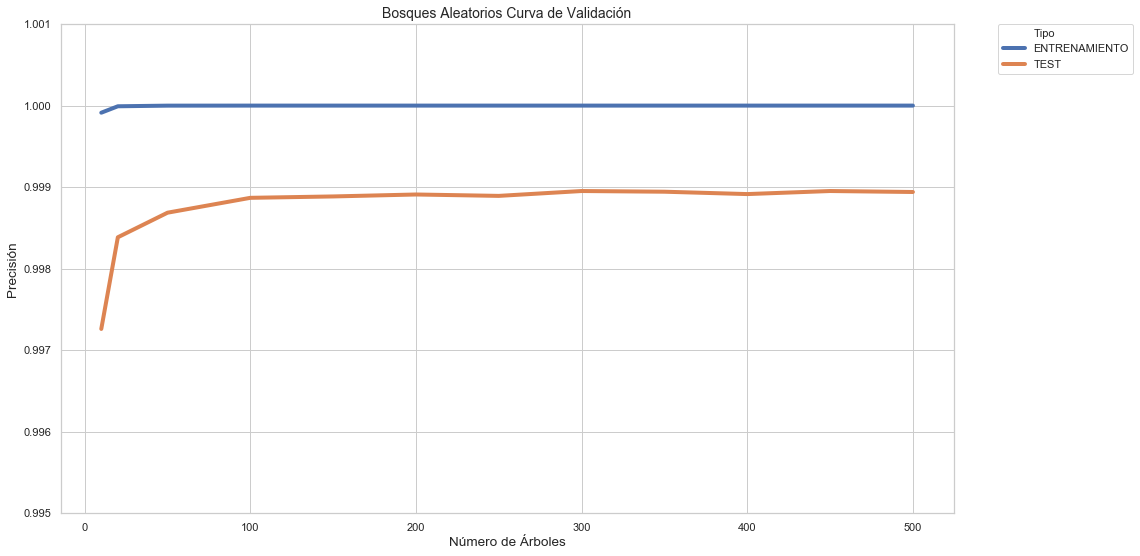

In [7]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Estimators', y="Accuracy", hue='Tipo', data=random_forest_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Bosques Aleatorios Curva de Validación", fontsize=14)
plt.ylim([0.995,1.001])
plt.xlabel('Número de Árboles')
plt.ylabel("Precisión")
plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Random_Forest_Validation-Curve')


In [8]:
knn_df = pd.read_csv('../data/resultados/curvaValidacion/knnClean.csv', sep=';')
knn_df.head()

,Neighbors,Accuracy,Tipo
0,1,1.000000,ENTRENAMIENTO
1,1,0.929223,TEST
2,3,0.964090,ENTRENAMIENTO
3,3,0.931191,TEST
4,5,0.952620,ENTRENAMIENTO


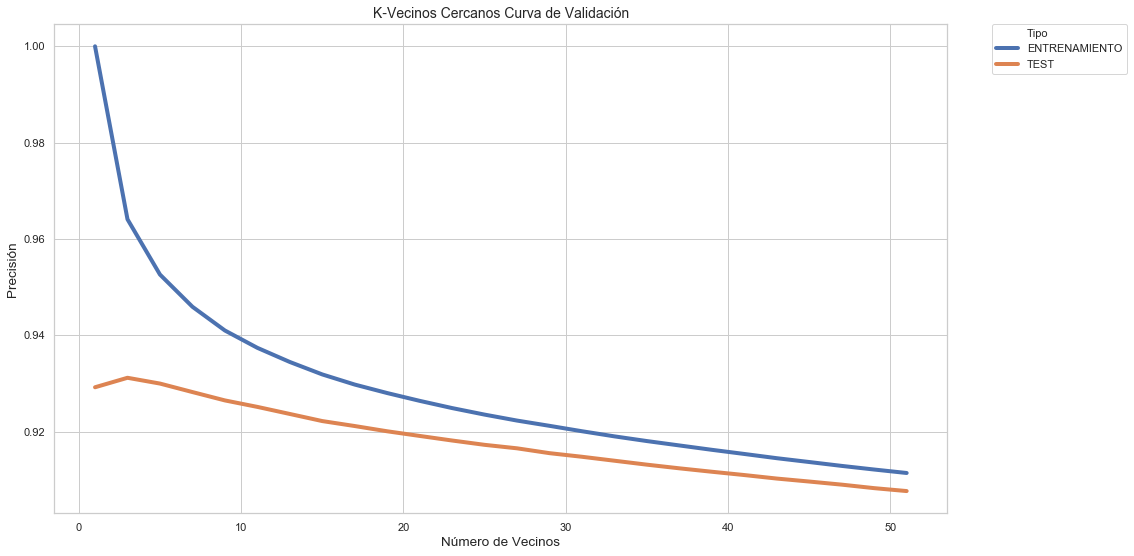

In [9]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Neighbors', y="Accuracy", hue='Tipo', data=knn_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("K-Vecinos Cercanos Curva de Validación", fontsize=14)
plt.xlabel('Número de Vecinos')
plt.ylabel("Precisión")
plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'KNN_Validation-Curve')


In [10]:
redes_neuronales_df = pd.read_csv('../data/resultados/curvaValidacion/rrnnClean.csv', sep=';')
redes_neuronales_df.head()

,Epoach,Accuracy,Tipo
0,10,0.901576,ENTRENAMIENTO
1,10,0.901636,TEST
2,20,0.912268,ENTRENAMIENTO
3,20,0.912211,TEST
4,50,0.927095,ENTRENAMIENTO


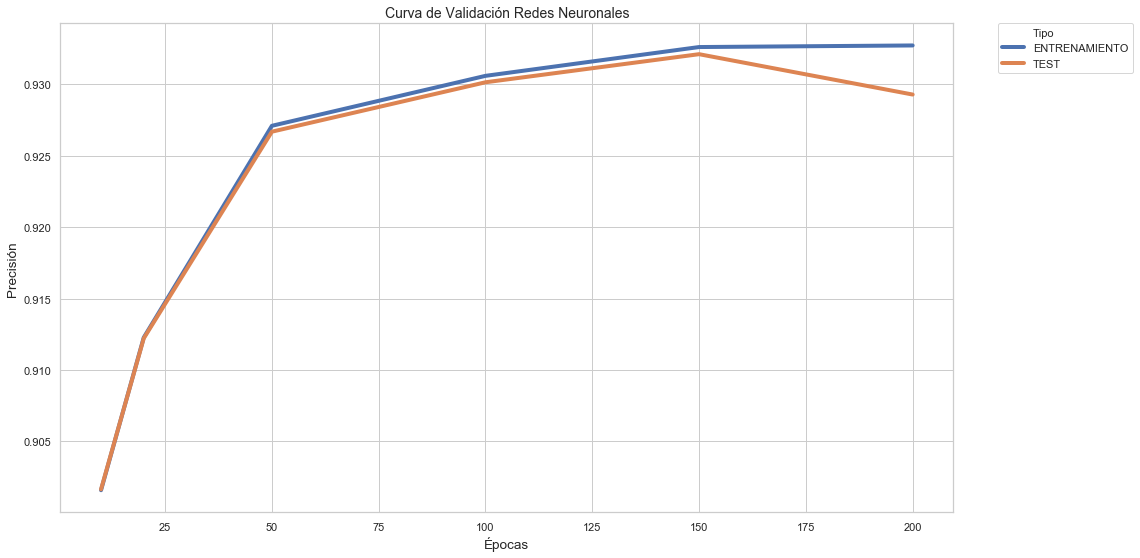

In [11]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Epoach', y="Accuracy", hue='Tipo', data=redes_neuronales_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Curva de Validación Redes Neuronales", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel("Precisión")
plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Neural_Network_Validation-Curve')
